# 数据分析：行为与内容特征


In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from funrec.utils import load_env_with_fallback

load_env_with_fallback()
RAW_DATA_PATH = Path(os.getenv('FUNREC_RAW_DATA_PATH'))
DATA_PATH = RAW_DATA_PATH / 'dataset' / 'news_recommendation'
if not DATA_PATH.exists():
    DATA_PATH = RAW_DATA_PATH / 'news_recommendation'

train_click = pd.read_csv(DATA_PATH / 'train_click_log.csv')
articles = pd.read_csv(DATA_PATH / 'articles.csv')

train_click.head()


,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,199999,160417,1507029570190,4,1,17,1,13,1
1,199999,5408,1507029571478,4,1,17,1,13,1
2,199999,50823,1507029601478,4,1,17,1,13,1
3,199998,157770,1507029532200,4,1,17,1,25,5
4,199998,96613,1507029671831,4,1,17,1,25,5


In [2]:
click_with_meta = train_click.merge(
    articles, left_on='click_article_id', right_on='article_id', how='left'
)

click_with_meta['click_dt'] = pd.to_datetime(
    click_with_meta['click_timestamp'], unit='ms'
)
click_with_meta['created_dt'] = pd.to_datetime(
    click_with_meta['created_at_ts'], unit='ms'
)
click_with_meta['age_hours'] = (
    (click_with_meta['click_timestamp'] - click_with_meta['created_at_ts'])
    / 3600_000
)

click_with_meta[['age_hours']].describe()


,age_hours
count,1.112623e+06
mean,2.748028e+02
std,2.316571e+03
min,-5.384675e+02
25%,5.373188e+00
50%,8.226630e+00
75%,1.681438e+01
max,9.457874e+04


In [3]:
top_categories = click_with_meta['category_id'].value_counts().head(20)
top_categories


category_id
375    111783
281    101619
250     71033
437     65787
412     63858
331     43129
209     32916
418     28855
399     27249
118     25216
421     24973
327     22745
26      22284
442     21839
136     20741
409     20402
323     17993
301     17206
252     16657
431     15739
Name: count, dtype: int64

Text(0.5, 1.0, 'Top categories by clicks')

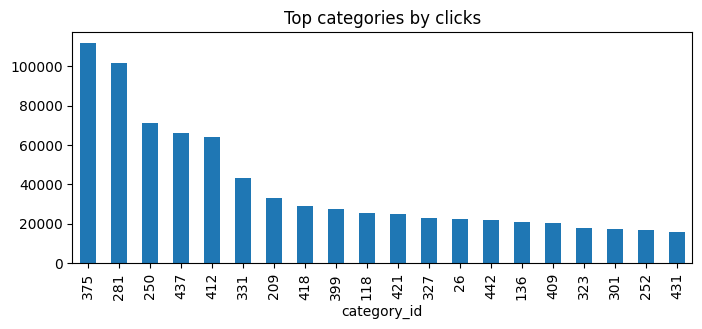

In [4]:
plt.figure(figsize=(8, 3))
top_categories.plot(kind='bar')
plt.title('Top categories by clicks')


Text(0.5, 1.0, 'Article age at click (<=30 days)')

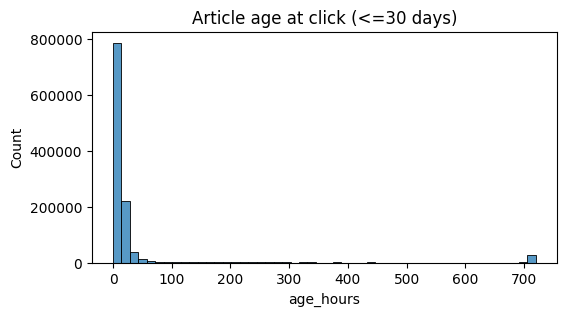

In [5]:
plt.figure(figsize=(6, 3))
sns.histplot(click_with_meta['age_hours'].clip(0, 24 * 30), bins=50)
plt.title('Article age at click (<=30 days)')


Text(0.5, 1.0, 'User click count ECDF')

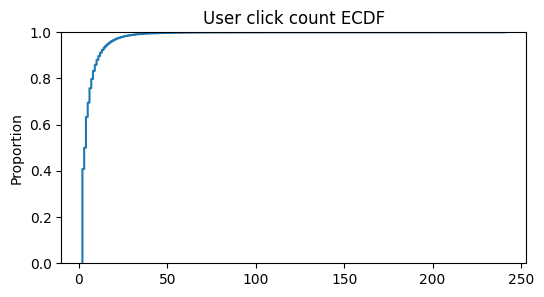

In [6]:
user_clicks = train_click.groupby('user_id').size()
plt.figure(figsize=(6, 3))
sns.ecdfplot(user_clicks)
plt.title('User click count ECDF')
